For the RFP control circuit:

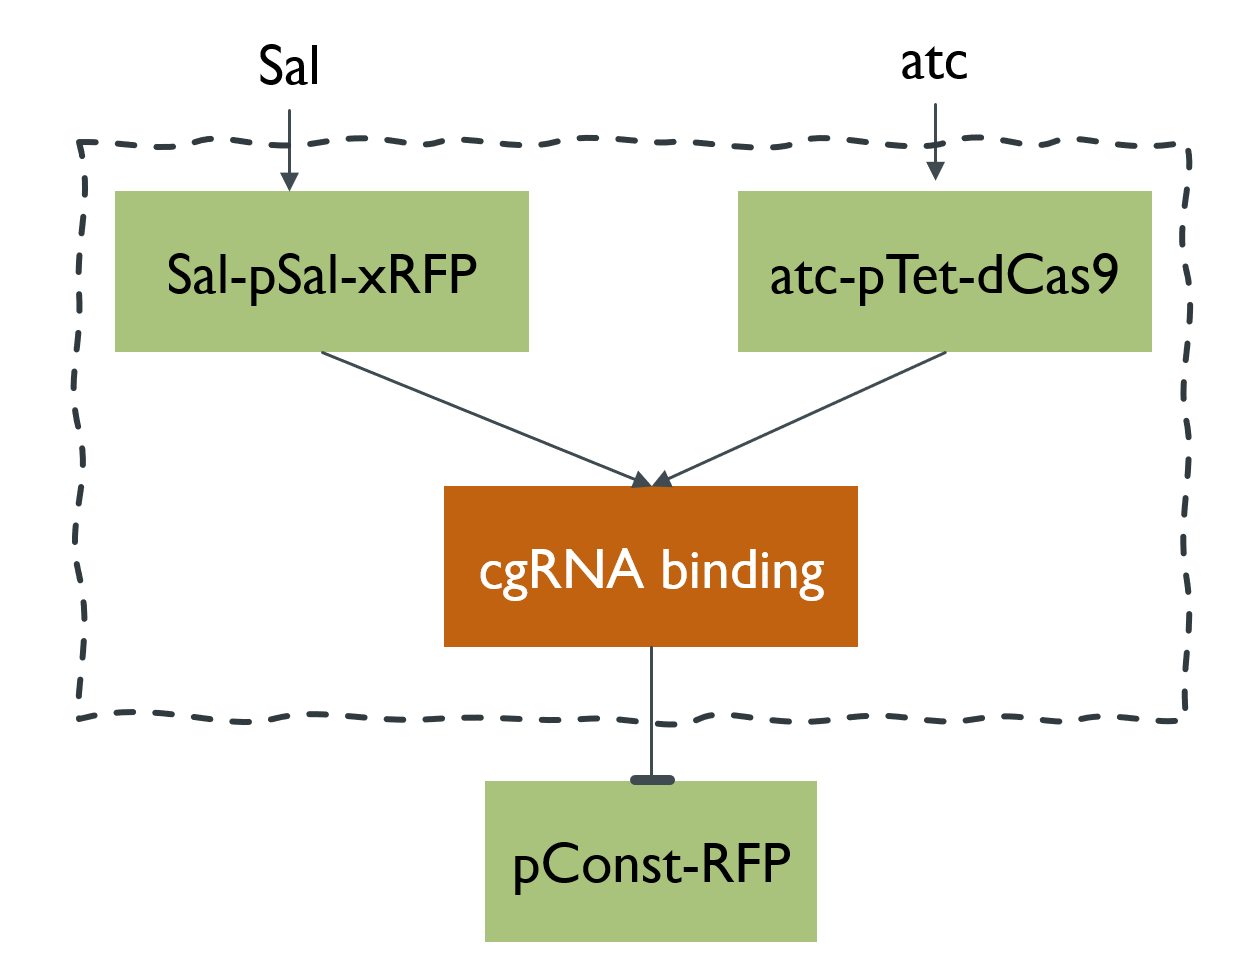

Subsystem 1: atc -> pSal -> xRFP gRNA

Subsystem 2: pConst -> RFP |- xRFP & dCas9

Subsystem 3: atc -| TetR -| pTet -> dCas9

Characterized parts availale: 
1. atc -| TetR -| pTet
2. pConst -> RFP
3. Sal -> pSal


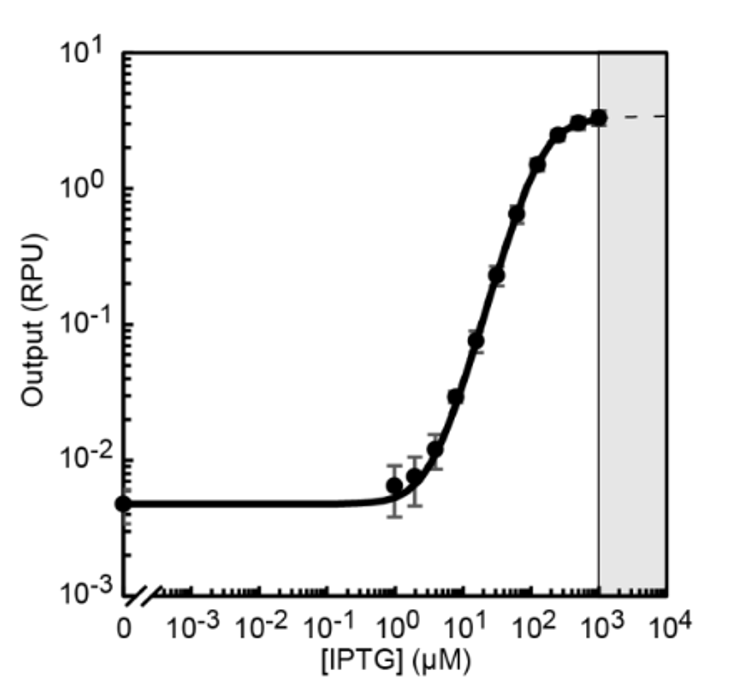
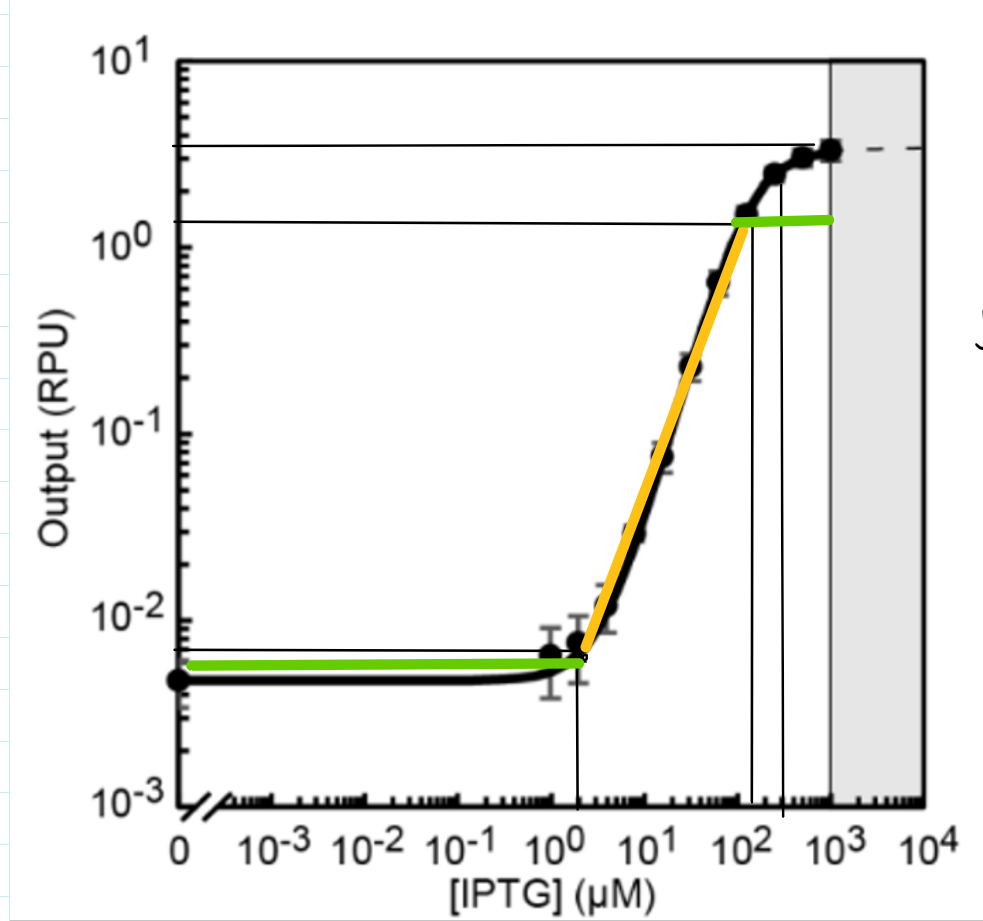

In [1]:
import pandas as pd
from io import StringIO
# Read the data from a string
data = '''
Inducer,Plasmid,Regulator,Promoter,ymax (RPU),ymin (RPUx10-3),K (µM),n,Dynamic range
DAPG,pAJM.847,PhlFAM,PPhlF,2.50,2.5,1.700,2.1,1000
Cuma,pAJM.657,CymRAM,PCymRC,3.70,4.3,8.900,2.4,870
OC6,pAJM.474,LuxR,PLuxB,1.30,2.4,0.120,1.8,540
Van,pAJM.773,VanRAM,PVanCC,3.00,2.4,26.000,2.3,1200
IPTG,pAJM.336,LacIAM,PTac,3.30,4.8,140.000,1.8,690
aTc,pAJM.011,TetR,PTet*,2.40,4.9,0.013,3.8,500
Ara,pAJM.677,AraCAM,PBAD,1.20,2.4,37.000,1.5,500
Cho,pAJM.683,BetIAM,PBetI,2.60,8.5,4100.00,2.7,310
Nar,pAJM.661,TtgRAM,PTtg,0.46,3.4,95.000,1.9,140
DHBA,pAJM.690,PcaUAM,P3B5B,1.60,4.5,370.000,1.8,360
Sal,pAJM.771,NahRAM,PSalTTC,2.80,4.7,43.000,1.8,600
OHC14,pAJM.1642,CinRAM,PCin,1.50,3.0,0.430,2.3,490
Acr,pAJM.884,AcuRAM,PAcu,3.10,37.0,130.000,2.5,83
Ery,pAJM.969,MphRAM,PMph,0.29,8.0,65.000,1.5,36
'''
df = pd.read_csv(StringIO(data))



In [14]:
x = df['K (µM)'][2]/540
print(f'{x:.2e}')

2.22e-04


In [16]:
3.3/4.8 * 10**3

687.5

In [2]:
df

,Inducer,Plasmid,Regulator,Promoter,ymax (RPU),ymin (RPUx10-3),K (µM),n,Dynamic range
0,DAPG,pAJM.847,PhlFAM,PPhlF,2.50,2.5,1.700,2.1,1000
1,Cuma,pAJM.657,CymRAM,PCymRC,3.70,4.3,8.900,2.4,870
2,OC6,pAJM.474,LuxR,PLuxB,1.30,2.4,0.120,1.8,540
3,Van,pAJM.773,VanRAM,PVanCC,3.00,2.4,26.000,2.3,1200
4,IPTG,pAJM.336,LacIAM,PTac,3.30,4.8,140.000,1.8,690
5,aTc,pAJM.011,TetR,PTet*,2.40,4.9,0.013,3.8,500
6,Ara,pAJM.677,AraCAM,PBAD,1.20,2.4,37.000,1.5,500
7,Cho,pAJM.683,BetIAM,PBetI,2.60,8.5,4100.000,2.7,310
8,Nar,pAJM.661,TtgRAM,PTtg,0.46,3.4,95.000,1.9,140
9,DHBA,pAJM.690,PcaUAM,P3B5B,1.60,4.5,370.000,1.8,360


### Contracts for IPTG sensor

In [18]:
yleak_iptg = df.loc[df["Inducer"] == "IPTG"]["ymin (RPUx10-3)"].values[0]*1e-3
iptg_start = 2
iptg_K = df.loc[df["Inducer"] == "IPTG"]["K (µM)"].values[0]
iptg_slope = 0.01
iptg_intercept = 0.0195
ymax_iptg = iptg_K*iptg_slope + iptg_intercept
contract_iptg0 = {
        "_comment": "",
        "InputVars":[
            "IPTG"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"IPTG":1},
            "constant":iptg_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1},
            "constant":-yleak_iptg},
            {"coefficients":{"RPU":1},
            "constant":yleak_iptg}
        ]
    }
contract_iptg_lin = {
        "_comment": "",
        "InputVars":[
            "IPTG"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"IPTG":1},
            "constant":iptg_K},
            {"coefficients":{"IPTG":-1},
            "constant":-iptg_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1, "IPTG":iptg_slope},
            "constant":iptg_intercept}, # make sure that there is wiggle room?
            {"coefficients":{"RPU":1, "IPTG":-iptg_slope},
            "constant":-iptg_intercept}
        ]
    }
contract_iptg_max = {
        "_comment": "",
        "InputVars":[
            "IPTG"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"IPTG":-1},
            "constant":-iptg_K}
        ],
        "guarantees":[
            {"coefficients":{"RPU":1},
            "constant":ymax_iptg}
        ]
    }

### Contracts for Sal sensor


In [23]:
yleak_sal = df.loc[df["Inducer"] == "Sal"]["ymin (RPUx10-3)"].values[0]*1e-3
sal_start = 2
sal_K = df.loc[df["Inducer"] == "Sal"]["K (µM)"].values[0]
sal_slope = 0.01
sal_intercept = 0.0195
ymax_sal = sal_K*sal_slope + sal_intercept
contract_sal0 = {
        "_comment": "",
        "InputVars":[
            "sal"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"sal":1},
            "constant":sal_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1},
            "constant":-yleak_sal},
            {"coefficients":{"RPU":1},
            "constant":yleak_sal}
        ]
    }
contract_sal_lin = {
        "_comment": "",
        "InputVars":[
            "sal"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"sal":1},
            "constant":sal_K},
            {"coefficients":{"sal":-1},
            "constant":-sal_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1, "sal":sal_slope},
            "constant":sal_intercept}, # make sure that there is wiggle room?
            {"coefficients":{"RPU":1, "sal":-sal_slope},
            "constant":-sal_intercept}
        ]
    }
contract_sal_max = {
        "_comment": "",
        "InputVars":[
            "sal"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"sal":-1},
            "constant":-sal_K}
        ],
        "guarantees":[
            {"coefficients":{"RPU":1},
            "constant":ymax_sal}
        ]
    }

### Contracts for aTc sensor

In [25]:
yleak_atc = df.loc[df["Inducer"] == "aTc"]["ymin (RPUx10-3)"].values[0]*1e-3
atc_start = 2
atc_K = df.loc[df["Inducer"] == "aTc"]["K (µM)"].values[0]
atc_slope = 0.01
atc_intercept = 0.0195
ymax_atc = atc_K*atc_slope + atc_intercept
contract_atc0 = {
        "_comment": "",
        "InputVars":[
            "atc"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"sal":1},
            "constant":atc_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1},
            "constant":-yleak_atc},
            {"coefficients":{"RPU":1},
            "constant":yleak_atc}
        ]
    }
contract_atc_lin = {
        "_comment": "",
        "InputVars":[
            "atc"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"atc":1},
            "constant":atc_K},
            {"coefficients":{"atc":-1},
            "constant":-atc_start}
        ],
        "guarantees":[
            {"coefficients":{"RPU":-1, "sal":atc_slope},
            "constant":atc_intercept}, # make sure that there is wiggle room?
            {"coefficients":{"RPU":1, "sal":-atc_slope},
            "constant":-atc_intercept}
        ]
    }
contract_atc_max = {
        "_comment": "",
        "InputVars":[
            "atc"
        ],
        "OutputVars":[
            "RPU"
        ],
        "assumptions":
        [
            {"coefficients":{"atc":-1},
            "constant":-atc_K}
        ],
        "guarantees":[
            {"coefficients":{"RPU":1},
            "constant":ymax_atc}
        ]
    }

### Top-level system contract

In [3]:
contract_top_level_0 = {
        "_comment": "in1:OFF, in2:OFF, out:ON",
        "InputVars":[
            "Sal", "atc"
        ],
        "OutputVars":[
            "RFP"
        ],
        "assumptions":
        [
            {"coefficients":{"Sal":1},
            "constant":1},
            {"coefficients":{"atc":1},
            "constant":2}
        ],
        "guarantees":[
            {"coefficients":{"RFP":-1},
            "constant":-10},
        ]
    }
contract_top_level_1 = {
        "_comment": "in1:ON, in2:OFF, out:ON",
        "InputVars":[
            "Sal", "atc"
        ],
        "OutputVars":[
            "RFP"
        ],
        "assumptions":
        [
            {"coefficients":{"Sal":-1},
            "constant":-2},
            {"coefficients":{"atc":1},
            "constant":2}
        ],
        "guarantees":[
            {"coefficients":{"RFP":-1},
            "constant":-10},
        ]
    }
contract_top_level_2 = {
        "_comment": "in1:OFF, in2:ON, out:ON",
        "InputVars":[
            "Sal", "atc"
        ],
        "OutputVars":[
            "RFP"
        ],
        "assumptions":
        [
            {"coefficients":{"Sal":1},
            "constant":1},
            {"coefficients":{"atc":-1},
            "constant":-4}
        ],
        "guarantees":[
            {"coefficients":{"RFP":-1},
            "constant":-10},
        ]
    }
contract_top_level_3 = {
        "_comment": "in1:ON, in2:ON, out:OFF",
        "InputVars":[
            "Sal", "atc"
        ],
        "OutputVars":[
            "RFP"
        ],
        "assumptions":
        [
            {"coefficients":{"Sal":-1},
            "constant":-2},
            {"coefficients":{"atc":-1},
            "constant":-4}
        ],
        "guarantees":[
            {"coefficients":{"RFP":-1, "Sal":2, "atc":2},
            "constant":-10},
        ]
    }

In [7]:
from gear.terms.polyhedra.loaders import readContract, writeContract
c1, c2, cs0, cs1, cs2, cs3 = readContract([contract1, contract2,
                                           contract_top_level_0,
                                           contract_top_level_1,
                                           contract_top_level_2,
                                           contract_top_level_3])

In [8]:
print(cs2)

InVars: [<Var Sal>, <Var atc>]
OutVars:[<Var RFP>]
A: 1*Sal <= 1, -1*atc <= -4
G: -1*RFP <= -10


In [9]:
missing_c3 = cs3.quotient(c1.compose(c2))

In [10]:
print(missing_c3)

InVars: [<Var xRFP>, <Var dCas9>]
OutVars:[<Var RFP>]
A: -1*xRFP <= -15, -1*dCas9 <= -50
G: -1*RFP + 1/5*dCas9 + 2/5*xRFP <= -6


In [11]:
system_json_contracts = writeContract([c1, c2, cs3, missing_c3], "rfp_control.json")

TypeError: Object of type int32 is not JSON serializable

In [12]:
system_json_contracts[3]

{'InputVars': ['dCas9', 'xRFP'],
 'OutputVars': ['RFP'],
 'assumptions': [{'constant': '-5', 'coefficients': {'dCas9': '-1/10'}},
  {'constant': '-3', 'coefficients': {'xRFP': '-1/5'}}],
 'guarantees': [{'constant': '-6',
   'coefficients': {'dCas9': '1/5', 'xRFP': '2/5', 'RFP': '-1'}}]}

For the xLacI group:

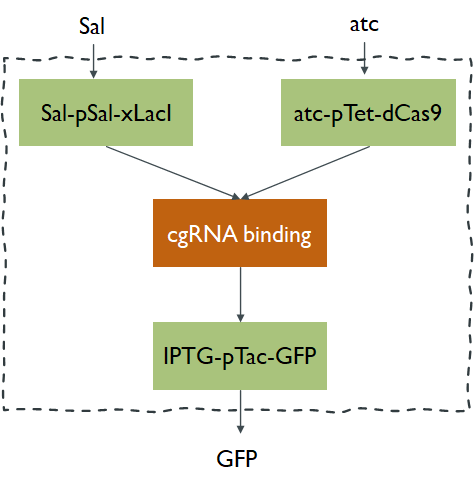

Full circuit

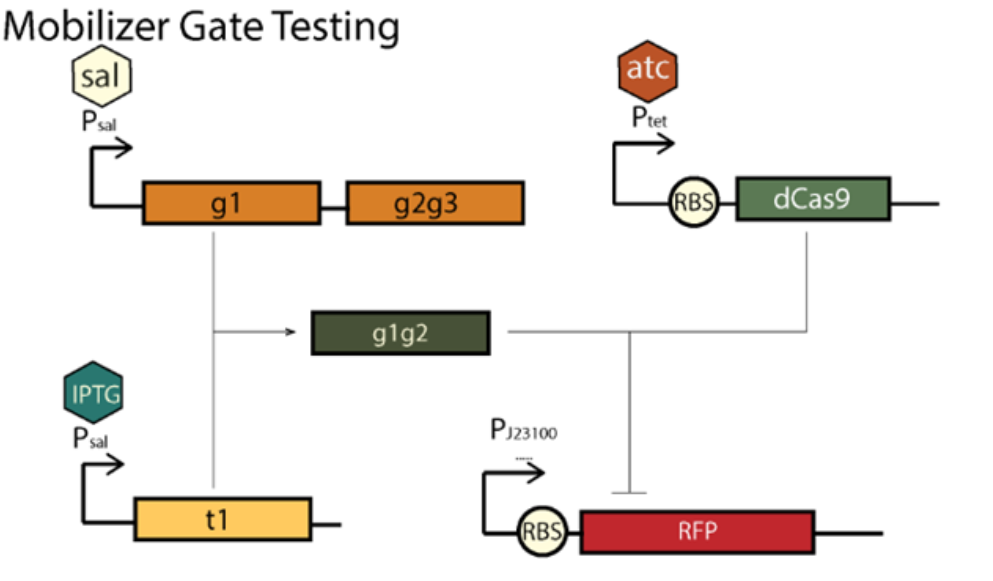